In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ratings=pd.read_csv("googleplaystore.csv")

In [3]:
ratings

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
ratings.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [103]:
ratings.shape

(10346, 9)

In [6]:
#This shows us the % of missing values of ratings
ratings['Rating'].isnull().sum()/len(ratings)*100

13.596531685268886

In [7]:
ratings['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [8]:
ratings.shape

(10841, 13)

In [9]:
ratings.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## DATA PREPROCESSING

In [10]:
# Here this row has rating more than 5. obv we need to drop it.row=(10472)
ratings[ratings['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
#dropping the row
ratings.drop(10472,axis=0,inplace=True)

In [12]:
## voila
ratings[ratings['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [13]:
## there are 483 duplicated columns in the dataset. DROP!!!!!!!
ratings.duplicated().sum()

483

In [14]:
#done
ratings.drop_duplicates(inplace=True)

In [15]:
ratings

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [16]:
### lets analyse the first column "CATEGORY"
### there are 33 unique categories
print("CATEGORIES =",len(ratings['Category'].unique()))
print(ratings['Category'].unique())

CATEGORIES = 33
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [17]:
### since the ratings 14 % is null we can replace it by median or we can drop the values and compare both to see which gives the best result
ratings['Rating'].replace(np.nan,ratings['Rating'].median(),inplace=True)

In [18]:
#we can drop the other rows 
ratings.dropna(inplace=True)

In [19]:
###voila your dataset is free of NULL values
ratings.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [20]:
##changing the dt to float because it was an object previously
ratings['Rating']=ratings['Rating'].astype(float)

In [21]:
ratings

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [22]:
##lets change reviews into integer value
ratings['Reviews']=ratings['Reviews'].astype(int)

In [23]:
##These columns need to be dropped causse the apps names doesnt help us in regression.
ratings.drop(['Last Updated','Current Ver','Android Ver','App'],axis=1,inplace=True)

In [24]:
ratings

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education
10837,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education
10838,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical
10839,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference


In [25]:
###lets use the lambda function to replace the '+' and ',' in the Installs column
ratings['Installs'] = ratings['Installs'].apply(lambda x: x.replace('+', ''))
ratings['Installs'] = ratings['Installs'].apply(lambda x: x.replace(',', ''))

In [26]:
#changing the dt to integer
ratings['Installs']=ratings['Installs'].astype(int)

In [27]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10346 non-null  object 
 1   Rating          10346 non-null  float64
 2   Reviews         10346 non-null  int32  
 3   Size            10346 non-null  object 
 4   Installs        10346 non-null  int32  
 5   Type            10346 non-null  object 
 6   Price           10346 non-null  object 
 7   Content Rating  10346 non-null  object 
 8   Genres          10346 non-null  object 
dtypes: float64(1), int32(2), object(6)
memory usage: 727.5+ KB


*CLEANING THE COLUMN "TYPE"

In [28]:
### for the 'type' column we can use label encoder
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [30]:
le.fit(ratings['Type'])

LabelEncoder()

In [31]:
ratings['Type']=le.transform(ratings['Type'])

In [32]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10346 non-null  object 
 1   Rating          10346 non-null  float64
 2   Reviews         10346 non-null  int32  
 3   Size            10346 non-null  object 
 4   Installs        10346 non-null  int32  
 5   Type            10346 non-null  int32  
 6   Price           10346 non-null  object 
 7   Content Rating  10346 non-null  object 
 8   Genres          10346 non-null  object 
dtypes: float64(1), int32(3), object(5)
memory usage: 687.0+ KB


*CLEANING THE COLUMN "PRICE"

In [33]:
ratings['Price'] = ratings['Price'].apply(lambda x: x.replace('$', ''))

In [34]:
ratings['Price']=ratings['Price'].astype(float)

In [35]:
ratings['Price'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10346 entries, 0 to 10840
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
10346 non-null  float64
dtypes: float64(1)
memory usage: 161.7 KB


In [36]:
ratings

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19M,10000,0,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14M,500000,0,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7M,5000000,0,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25M,50000000,0,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8M,100000,0,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.5,38,53M,5000,0,0.0,Everyone,Education
10837,FAMILY,5.0,4,3.6M,100,0,0.0,Everyone,Education
10838,MEDICAL,4.3,3,9.5M,1000,0,0.0,Everyone,Medical
10839,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,0,0.0,Mature 17+,Books & Reference


In [37]:
ratings["Size"].replace("Varies with device",np.nan,inplace=True)

In [38]:
ratings['Size']

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10836     53M
10837    3.6M
10838    9.5M
10839     NaN
10840     19M
Name: Size, Length: 10346, dtype: object

In [39]:
ratings

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19M,10000,0,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14M,500000,0,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7M,5000000,0,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25M,50000000,0,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8M,100000,0,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.5,38,53M,5000,0,0.0,Everyone,Education
10837,FAMILY,5.0,4,3.6M,100,0,0.0,Everyone,Education
10838,MEDICAL,4.3,3,9.5M,1000,0,0.0,Everyone,Medical
10839,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,0,0.0,Mature 17+,Books & Reference


*CLEANING THE COLUMN "SIZE"

In [40]:
ratings['Size'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10346 entries, 0 to 10840
Series name: Size
Non-Null Count  Dtype 
--------------  ----- 
8821 non-null   object
dtypes: object(1)
memory usage: 161.7+ KB


In [41]:
ratings['Size']=ratings['Size'].astype("str")

In [42]:
ratings['Size'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10346 entries, 0 to 10840
Series name: Size
Non-Null Count  Dtype 
--------------  ----- 
10346 non-null  object
dtypes: object(1)
memory usage: 161.7+ KB


In [43]:
###converted the column into string and then converted kb into mb and mb as it is.
size =[]

for i in ratings['Size']:
    if i == 'nan':
        size.append('NaN')
    elif i[-1] == 'k':
        size.append(float(i[:-1])/1024)
    else:
        size.append(float(i[:-1]))

In [44]:
ratings['Size']=size

In [45]:
ratings['Size']=ratings['Size'].astype(float)

In [46]:
#replaced the nan values ie, (values may vary with device) to median
ratings['Size'].replace(np.nan,21.306,inplace=True)

In [47]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10346 non-null  object 
 1   Rating          10346 non-null  float64
 2   Reviews         10346 non-null  int32  
 3   Size            10346 non-null  float64
 4   Installs        10346 non-null  int32  
 5   Type            10346 non-null  int32  
 6   Price           10346 non-null  float64
 7   Content Rating  10346 non-null  object 
 8   Genres          10346 non-null  object 
dtypes: float64(3), int32(3), object(3)
memory usage: 687.0+ KB


In [48]:

le=LabelEncoder()

In [49]:
le.fit(ratings['Content Rating'])

LabelEncoder()

In [50]:
ratings['Content Rating']=le.transform(ratings['Content Rating'])

In [51]:
ratings

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19.000,10000,0,0.0,1,Art & Design
1,ART_AND_DESIGN,3.9,967,14.000,500000,0,0.0,1,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.700,5000000,0,0.0,1,Art & Design
3,ART_AND_DESIGN,4.5,215644,25.000,50000000,0,0.0,4,Art & Design
4,ART_AND_DESIGN,4.3,967,2.800,100000,0,0.0,1,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.5,38,53.000,5000,0,0.0,1,Education
10837,FAMILY,5.0,4,3.600,100,0,0.0,1,Education
10838,MEDICAL,4.3,3,9.500,1000,0,0.0,1,Medical
10839,BOOKS_AND_REFERENCE,4.5,114,21.306,1000,0,0.0,3,Books & Reference


In [52]:
dum1=pd.get_dummies(ratings['Category'])

In [53]:
dum1

,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
main=pd.concat([ratings,dum1],axis=1)

In [55]:
main

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,ART_AND_DESIGN,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,ART_AND_DESIGN,4.1,159,19.000,10000,0,0.0,1,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
1,ART_AND_DESIGN,3.9,967,14.000,500000,0,0.0,1,Art & Design;Pretend Play,1,...,0,0,0,0,0,0,0,0,0,0
2,ART_AND_DESIGN,4.7,87510,8.700,5000000,0,0.0,1,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
3,ART_AND_DESIGN,4.5,215644,25.000,50000000,0,0.0,4,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
4,ART_AND_DESIGN,4.3,967,2.800,100000,0,0.0,1,Art & Design;Creativity,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.5,38,53.000,5000,0,0.0,1,Education,0,...,0,0,0,0,0,0,0,0,0,0
10837,FAMILY,5.0,4,3.600,100,0,0.0,1,Education,0,...,0,0,0,0,0,0,0,0,0,0
10838,MEDICAL,4.3,3,9.500,1000,0,0.0,1,Medical,0,...,0,0,0,0,0,0,0,0,0,0
10839,BOOKS_AND_REFERENCE,4.5,114,21.306,1000,0,0.0,3,Books & Reference,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
dum12=pd.get_dummies(ratings['Genres'])

In [57]:
main=pd.concat([main,dum12],axis=1)

In [58]:
main

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,ART_AND_DESIGN,...,Tools;Education,Travel & Local,Travel & Local;Action & Adventure,Trivia,Trivia;Education,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Word
0,ART_AND_DESIGN,4.1,159,19.000,10000,0,0.0,1,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
1,ART_AND_DESIGN,3.9,967,14.000,500000,0,0.0,1,Art & Design;Pretend Play,1,...,0,0,0,0,0,0,0,0,0,0
2,ART_AND_DESIGN,4.7,87510,8.700,5000000,0,0.0,1,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
3,ART_AND_DESIGN,4.5,215644,25.000,50000000,0,0.0,4,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
4,ART_AND_DESIGN,4.3,967,2.800,100000,0,0.0,1,Art & Design;Creativity,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,FAMILY,4.5,38,53.000,5000,0,0.0,1,Education,0,...,0,0,0,0,0,0,0,0,0,0
10837,FAMILY,5.0,4,3.600,100,0,0.0,1,Education,0,...,0,0,0,0,0,0,0,0,0,0
10838,MEDICAL,4.3,3,9.500,1000,0,0.0,1,Medical,0,...,0,0,0,0,0,0,0,0,0,0
10839,BOOKS_AND_REFERENCE,4.5,114,21.306,1000,0,0.0,3,Books & Reference,0,...,0,0,0,0,0,0,0,0,0,0


## Here We convert  data based on ratings into 2 catogories.
*1. ratings below 4 as 0 class
*2. ratings above 1 as 1 class

In [59]:

main1=main[main['Rating']<4]
main1['Rating']=0
main2=main[main['Rating']>=4]
main2['Rating']=1

C:\Users\Amith Ullas\AppData\Local\Temp\ipykernel_7448\3831400352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main1['Rating']=0
C:\Users\Amith Ullas\AppData\Local\Temp\ipykernel_7448\3831400352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main2['Rating']=1


In [60]:
realdata=pd.concat([main1,main2])

In [61]:
realdata

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,ART_AND_DESIGN,...,Tools;Education,Travel & Local,Travel & Local;Action & Adventure,Trivia,Trivia;Education,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Word
1,ART_AND_DESIGN,0,967,14.000,500000,0,0.0,1,Art & Design;Pretend Play,1,...,0,0,0,0,0,0,0,0,0,0
6,ART_AND_DESIGN,0,178,19.000,50000,0,0.0,1,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
28,ART_AND_DESIGN,0,136,4.600,10000,0,0.0,1,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
35,ART_AND_DESIGN,0,564,9.200,100000,0,0.0,1,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
43,ART_AND_DESIGN,0,2206,1.200,100000,0,0.0,1,Art & Design;Creativity,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,FAMILY,1,38,53.000,5000,0,0.0,1,Education,0,...,0,0,0,0,0,0,0,0,0,0
10837,FAMILY,1,4,3.600,100,0,0.0,1,Education,0,...,0,0,0,0,0,0,0,0,0,0
10838,MEDICAL,1,3,9.500,1000,0,0.0,1,Medical,0,...,0,0,0,0,0,0,0,0,0,0
10839,BOOKS_AND_REFERENCE,1,114,21.306,1000,0,0.0,3,Books & Reference,0,...,0,0,0,0,0,0,0,0,0,0


## we need to resample the data with 0 class cause its only 18% of the whole data

In [62]:
out0=realdata[realdata['Rating']==0]
out1=realdata[realdata['Rating']==1]

In [63]:
realdata['Rating'].value_counts()/len(realdata)

1    0.812101
0    0.187899
Name: Rating, dtype: float64

C:\Users\Amith Ullas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

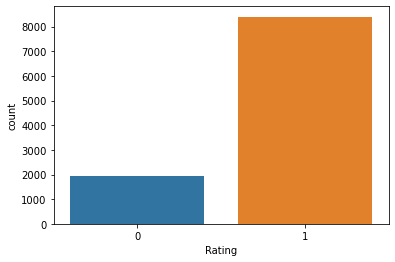

In [64]:
#check if data is having imbalanced classes
sns.countplot(realdata['Rating'])

In [65]:
from sklearn.utils import resample
resample1=resample(out0,n_samples=5500,replace=True,random_state=123)

In [66]:
resampled=pd.concat([resample1,out1])

In [67]:
#most importaint code
shuffled_df = resampled.sample(frac=1, random_state=42)

In [68]:
#look at that!!!!
shuffled_df['Rating'].value_counts()/len(shuffled_df)

1    0.604373
0    0.395627
Name: Rating, dtype: float64

C:\Users\Amith Ullas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

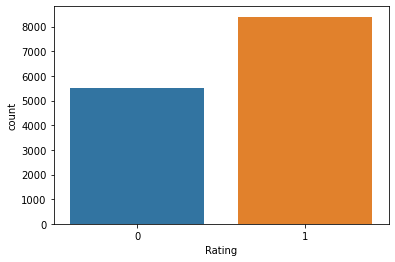

In [69]:
#check if data is having imbalanced classes
sns.countplot(shuffled_df['Rating'])

## Spliting into training and testing

In [70]:

x=shuffled_df.drop(['Rating','Category','Genres'],axis=1)

In [71]:
y=shuffled_df['Rating']

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=120)

In [73]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

## Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lr=LogisticRegression()

In [76]:
lr.fit(x_train,y_train)

C:\Users\Amith Ullas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
lr.score(x_test,y_test)

0.6375404530744336

In [78]:
from sklearn.metrics import confusion_matrix,classification_report

In [79]:
yhat=lr.predict(x_test)

In [80]:
confusion_matrix(y_test,yhat)

array([[ 444,  632],
       [ 376, 1329]], dtype=int64)

<AxesSubplot:>

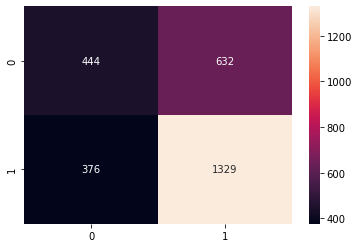

In [81]:
sns.heatmap(confusion_matrix(y_test,yhat),annot=True,fmt='0.0f')

In [82]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.54      0.41      0.47      1076
           1       0.68      0.78      0.73      1705

    accuracy                           0.64      2781
   macro avg       0.61      0.60      0.60      2781
weighted avg       0.62      0.64      0.63      2781



## Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='gini', max_depth=12,random_state=4)

In [84]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12, random_state=4)

In [85]:
clf.score(x_test,y_test)

0.749730312837109

In [86]:
yhatdt=clf.predict(x_test)

In [87]:
confusion_matrix(y_test,yhatdt)

array([[ 879,  197],
       [ 499, 1206]], dtype=int64)

<AxesSubplot:>

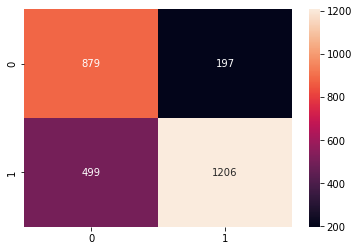

In [88]:
sns.heatmap(confusion_matrix(y_test,yhatdt),annot=True,fmt='0.0f')

In [89]:
print(classification_report(y_test,yhatdt))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72      1076
           1       0.86      0.71      0.78      1705

    accuracy                           0.75      2781
   macro avg       0.75      0.76      0.75      2781
weighted avg       0.77      0.75      0.75      2781



## Random Forest

In [90]:
## nestimate= number of decision trees
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000,criterion='gini',max_features=120,max_depth=15,bootstrap=True,random_state=12)

In [91]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, max_features=120, n_estimators=1000,
                       random_state=12)

In [92]:
rf.score(x_test,y_test)

0.810499820208558

In [93]:
yh=rf.predict(x_test)

In [94]:
confusion_matrix(yh,y_test)

array([[ 959,  410],
       [ 117, 1295]], dtype=int64)

<AxesSubplot:>

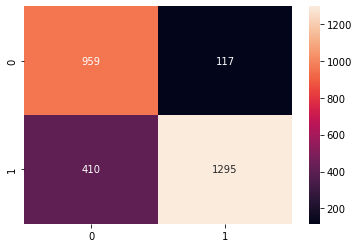

In [95]:
sns.heatmap(confusion_matrix(y_test,yh),annot=True,fmt='0.0f')

In [96]:
print(classification_report(yh,y_test))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78      1369
           1       0.76      0.92      0.83      1412

    accuracy                           0.81      2781
   macro avg       0.83      0.81      0.81      2781
weighted avg       0.82      0.81      0.81      2781



In [97]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5,metric='euclidean',weights='distance')  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(metric='euclidean', weights='distance')

In [98]:
classifier.score(x_test,y_test)

0.8399856166846458

In [99]:
y_pred= classifier.predict(x_test)  

In [100]:
confusion_matrix(y_pred,y_test)

array([[ 998,  367],
       [  78, 1338]], dtype=int64)

<AxesSubplot:>

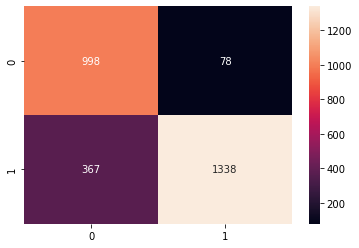

In [101]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.0f')

In [102]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1365
           1       0.78      0.94      0.86      1416

    accuracy                           0.84      2781
   macro avg       0.86      0.84      0.84      2781
weighted avg       0.85      0.84      0.84      2781

